# COVID-19 Pandemic: Examining Its General Effects, Intensity & Vaccination
### Spring 2021  - IS 597: Progr Analytics & Data Process  (Type II Project)
#### By Malik Salami (malikos2)

### Project Description:
The aim of this project is to get an insight from the world COVID-19 dataset through inferential analysis to measure the degree of relationship between various COVID-19 variables/factors - considering its general effects, intensity, and vaccination - to know its contribution towards reduction of its effects. The study performs further analysis (multiple regression analysis) to understand how some of the COVID-19 variables predict one another.


### Data Source:
This is secondary data that was collected from Our World in Data
https://ourworldindata.org/covid-vaccinations

Their primary source of data are from different countries, organizations, etc.
https://ourworldindata.org/covid-vaccinations#source-information-country-by-country


### Data Set:
For testing of the two hypotheses, only 16 countries (as at the time of data collection) met our variable of interest. The countries are:
'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Portugal', 'Slovenia', 'United Kingdom', 'United States'.

For the Multiple Regression Analysis (MRS), the independent variables were scrutized for suitability for the test. Only three variables: 'hosp_patients', 'new_tests', and 'total_vaccinations' were satisfied the MRS condition and were used as predicator variables for the COVID-19 General Effect (independent) variables. Therefore the raw data were re-assessed for analysis thus an additional 11 countries were included for the MRS. The countries are:
'Lithuania', 'Croatia', 'Czechia', 'Slovakia', 'Iceland', 'Sweden', 'Hungary', 'Latvia', 'France', 'Poland', 'Norway'.

### Variables Definitions:
- COVID-19 General Effect Variables: 
<p> these are COVID-19 infection indicators that could to led to death. They are: 
    'total_cases','new_cases', 'total_deaths','new_deaths'.</p>
- COVID-19 Preventive Variables: 
<p> these are COVID-19  protective indicators. They are:
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'.</p>
- COVID-19 Intensive Variables: 
<p> these are COVID-19 infection indicators that led to hospital admission. They are: 
    'icu_patients', 'hosp_patients', 'total_tests', 'new_tests'.</p>


## Hypotheses:
- H1: There is no significant relationship between COVID-19 Preventive Variables and COVID-19 General Effect Variable.
- H2: There is no significant relationship between COVID-19 Intensive Variables and COVID-19 General Effect Variable.
#### Further Analysis:
After Correlation analysis were conducted to test the above hypotheses, a futher analysis (multiple regression analysis) was conducted to identify the extend to which some qualified COVID-19 Intensive & Vaccination Variables (independent variables) were able to predict the COVID-19 General Effect Variables (dependent variables).


### Limitation

The limitations observed from the dataset were two:
1. Many of the countries in the dataset doesn't having their data filled up-to-date.
2. Many of the countries in the dataset doesn't have their records completed.
These two limitions caused this study low data-size. 

### Loading the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)


In [4]:
def load_data(filename: str, col: list) -> pd.DataFrame:
    """
    Load full data and filter the columns of interest into dataframe 
    :param filename:  loads dataframe of countries' records
    :param col: columns of interest that are needed
    :return: a dataFrame of records after filtering the columns
    """
    col = ['iso_code', 'continent', 'location', 'date']+col
    data = pd.read_csv(filename)
    out_file = data.filter(items =col)
    return out_file
    

In [67]:
def get_last_row(df:  pd.DataFrame) -> pd.DataFrame:
    """
    Read the record on the last row for each country 
    :param df: loads dataframe of countries' records
    :return: a dataframe of last row records for each country if the date postdate 2021,3,31
    """
    df.dropna(inplace = True)
    df['date']= pd.to_datetime(df['date'],format='%Y/%m/%d')
    result = df.groupby(['location']).last().reset_index()
    result = result[result['date'] >  pd.Timestamp(2021,3,31)]
    return result

In [6]:
def analyze_1(df:  pd.DataFrame): 
    """
    Analyzes DataFrame to find the correlation and display in table and heatmap
    :param df: loads dataframe of countries' records
    :return: nothing
    """
    display(df.describe())
    pearsoncorr = df.corr(method='pearson')
    sns.heatmap(pearsoncorr, 
    xticklabels=pearsoncorr.columns,
    yticklabels=pearsoncorr.columns,
    cmap='RdBu_r',
    annot=True,
    linewidth=0.5)
    display(pearsoncorr)
    sns.pairplot(df)

In [7]:
def check_var_inf_fact(df: pd.DataFrame,  drop_var:list):
    """
    It checks Variance Inflation Factor (VIF) of independents variables to ascertain right variables are  chosen.
    It prints the VIF result before and after dropping the highly correlated variables.
    :param df: loads dataframe of countries' records
    :param remove columns/variables that are highly correlated
    :return: nothing.
    """
    
    independent_var_before = df
    independent_var_after = df.drop(drop_var, axis=1) 

    # the VFI does expect a constant term in the data, so we need to add one using the add_constant method
    X1 = sm.tools.add_constant(independent_var_before)
    X2 = sm.tools.add_constant(independent_var_after)

    # create the series for both
    series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
    series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

    # display the series
    print('DATA BEFORE')
    print('-'*100)
    display(series_before)

    print('DATA AFTER')
    print('-'*100)
    display(series_after)
    
    pd.plotting.scatter_matrix(independent_var_after, alpha = 1, figsize = (7, 5))
    # show the plot
    plt.show()

In [68]:
def create_OLS_Model(dep_var: str, ind_var: pd.DataFrame) -> sm.regression.linear_model.RegressionResultsWrapper:
    X2 = ind_var # X is the input variables (or independent variables)
    y2 = dep_var # is the output/dependent variable
    X2 = sm.add_constant(X2) # Adding an intercept (beta_0) to the model
    
    # create a OLS model 'sm.OLS(y2, X2)' and fit the data '.fit()'
    model_ind_var = sm.OLS(y2, X2).fit() ## sm.OLS(output, input)
    print(model_ind_var)
    
    return model_ind_var

In [9]:

gen_effect_var = ['total_cases', 'new_cases', 'total_deaths','new_deaths']
intensive_var = ['icu_patients', 'hosp_patients', 'total_tests', 'new_tests']
preventive_var = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

### DATA ANALYSIS

#### Hypothesis One Analysis

In [10]:
data = pd.read_csv('owid-covid-data.csv')
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82833,ZWE,Africa,Zimbabwe,2021-04-15,37422.0,53.0,52.857,1550.0,2.0,2.571,2517.808,3.566,3.556,104.286,0.135,0.173,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285881.0,252932.0,32949.0,23753.0,13172.0,1.92,1.70,0.22,886.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82834,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,2525.344,7.536,3.720,104.354,0.067,0.154,1.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304701.0,269732.0,34969.0,18820.0,14071.0,2.05,1.81,0.24,947.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82835,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,2536.445,11.101,4.095,104.421,0.067,0.135,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311901.0,276095.0,35806.0,7200.0,12738.0,2.10,1.86,0.24,857.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82836,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,66.143,1553.0,1.0,2.143,2539.944,3.4

In [19]:
# load data for General Effect Variables & Preventive Variables
used_data = load_data('owid-covid-data.csv', gen_effect_var+preventive_var )
used_data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
82833,ZWE,Africa,Zimbabwe,2021-04-15,37422.0,53.0,1550.0,2.0,285881.0,252932.0,32949.0
82834,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,1551.0,1.0,304701.0,269732.0,34969.0
82835,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,1552.0,1.0,311901.0,276095.0,35806.0
82836,ZWE,Africa,Zimbabwe,2021-04-18,37751.0,52.0,1553.0,1.0,314446.0,278583.0,35863.0


In [20]:
data4analysis = get_last_row(used_data)
display(data4analysis.describe())

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,9.000000e+01,90.000000,90.000000,90.000000,9.000000e+01,9.000000e+01,9.000000e+01
mean,1.488164e+06,7717.088889,32061.255556,104.788889,7.655163e+06,5.457356e+06,2.277919e+06
std,4.000852e+06,28900.954881,78305.187707,254.100064,2.635227e+07,1.838511e+07,9.265439e+06
min,2.387000e+03,0.000000,25.000000,0.000000,4.748000e+03,4.620000e+03,5.000000e+00
25%,9.864875e+04,159.750000,941.250000,1.000000,2.279162e+05,1.933280e+05,3.835150e+04
50%,3.123345e+05,995.000000,6259.000000,17.000000,1.174452e+06,7.351195e+05,2.625655e+05
75%,1.100864e+06,2796.250000,24828.250000,96.000000,3.594285e+06,2.545890e+06,8.709065e+05
max,3.173796e+07,259167.000000,567694.000000,1761.000000,2.115813e+08,1.323216e+08,8.536518e+07


,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,9.000000e+01,90.000000,90.000000,90.000000,9.000000e+01,9.000000e+01,9.000000e+01
mean,1.488164e+06,7717.088889,32061.255556,104.788889,7.655163e+06,5.457356e+06,2.277919e+06
std,4.000852e+06,28900.954881,78305.187707,254.100064,2.635227e+07,1.838511e+07,9.265439e+06
min,2.387000e+03,0.000000,25.000000,0.000000,4.748000e+03,4.620000e+03,5.000000e+00
25%,9.864875e+04,159.750000,941.250000,1.000000,2.279162e+05,1.933280e+05,3.835150e+04
50%,3.123345e+05,995.000000,6259.000000,17.000000,1.174452e+06,7.351195e+05,2.625655e+05
75%,1.100864e+06,2796.250000,24828.250000,96.000000,3.594285e+06,2.545890e+06,8.709065e+05
max,3.173796e+07,259167.000000,567694.000000,1761.000000,2.115813e+08,1.323216e+08,8.536518e+07


,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated
total_cases,1.000000,0.623903,0.941392,0.664613,0.951305,0.928525,0.919398
new_cases,0.623903,1.000000,0.455444,0.820021,0.684626,0.776420,0.421675
total_deaths,0.941392,0.455444,1.000000,0.627499,0.841300,0.809507,0.839515
new_deaths,0.664613,0.820021,0.627499,1.000000,0.580618,0.653386,0.365751
total_vaccinations,0.951305,0.684626,0.841300,0.580618,1.000000,0.988259,0.940624
people_vaccinated,0.928525,0.776420,0.809507,0.653386,0.988259,1.000000,0.877789
people_fully_vaccinated,0.919398,0.421675,0.839515,0.365751,0.940624,0.877789,1.000000


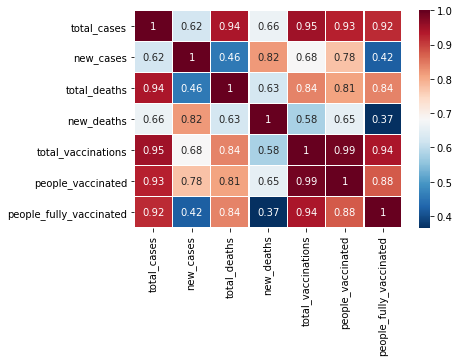

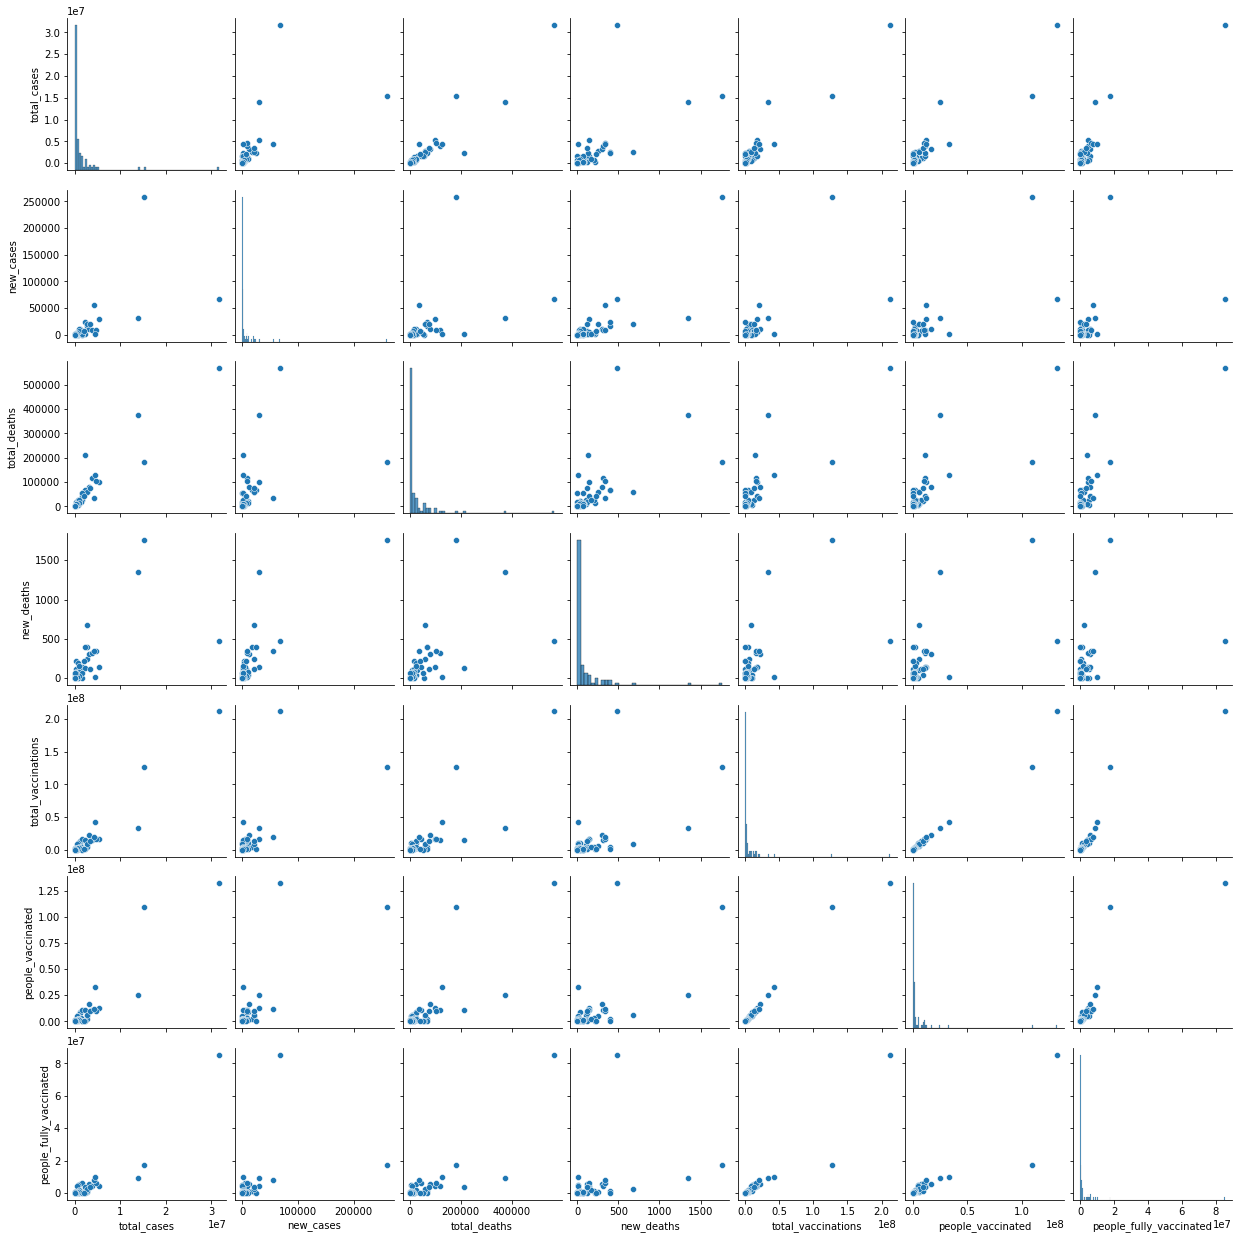

In [47]:
analyze_1(data4analysis)

### Interpretation Guide:
A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship.

### Hypothesis 1 Interpretation:
There are strong indication in the above analysis that COVID-19 Prevention Variables and COVID-19 General Effect Variables are strongly related except for new cases and people_fully_vaccinated that is  0.421675; and new death and people_fully_vaccinated that is 0.365751, that are weakly correlated. Nevertheless, total_vaccinations have been strongly correlated all through.
Therefore, H1 is rejected which says:there is no significant relationship between COVID-19 Preventive Variables and COVID-19 General Effect Variable.

#### Hypothesis Two Analysis

In [94]:
# load data for General Effect Variables & Intensive Variables
used_data2 = load_data('owid-covid-data.csv', gen_effect_var+intensive_var)
used_data2.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# getting the row of data for each country
data4analysis2 = get_last_row(used_data2)
data4analysis2

,location,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests
0,Austria,AUT,Europe,2021-04-11,577007.0,2252.0,9687.0,25.0,599.0,1705.0,26679075.0,200841.0
1,Belgium,BEL,Europe,2021-04-11,925476.0,2989.0,23473.0,45.0,899.0,3085.0,11725028.0,19386.0
2,Bulgaria,BGR,Europe,2021-04-11,371993.0,462.0,14418.0,67.0,801.0,10365.0,2266672.0,9117.0
3,Canada,CAN,North America,2021-04-15,1104508.0,9609.0,23482.0,54.0,1117.0,3766.0,29497034.0,133741.0
4,Cyprus,CYP,Europe,2021-04-11,51505.0,470.0,272.0,0.0,33.0,225.0,4205567.0,55096.0
5,Denmark,DNK,Europe,2021-04-11,238484.0,691.0,2442.0,2.0,38.0,211.0,23755508.0,154039.0
6,Estonia,EST,Europe,2021-04-11,114174.0,438.0,1028.0,8.0,70.0,601.0,1198517.0,2660.0
7,Finland,FIN,Europe,2021-04-09,81261.0,419.0,868.0,2.0,41.0,224.0,4166532.0,19644.0
9,Ireland,IRL,Europe,2021-04-11,240945.0,302.0,4785.0,2.0,53.0,213.0,4184407.0,14355.0
10,Israel,ISR,Asia,2021-04-15,836902.0,312.0,6315.0,3.0,129.0,348.0,15606781.0,14180.0


In [193]:
display(data4analysis2.describe())

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests
count,1.600000e+01,16.000000,16.00000,16.000000,16.0000,16.000000,1.600000e+01,1.600000e+01
mean,2.823053e+06,7200.187500,57109.31250,88.375000,1096.3125,5888.062500,4.505833e+07,1.564017e+05
std,7.714467e+06,19318.344882,140578.84111,212.170333,2421.1802,11741.731936,9.923063e+07,2.958120e+05
min,5.150500e+04,0.000000,272.00000,0.000000,30.0000,129.000000,1.105344e+06,4.580000e+02
25%,1.984178e+05,433.250000,2088.50000,2.000000,50.0000,224.750000,3.752460e+06,1.190775e+04
50%,4.745000e+05,557.500000,8001.00000,7.500000,134.0000,608.000000,1.062826e+07,1.951500e+04
75%,9.702340e+05,2644.000000,23475.25000,47.250000,825.5000,3255.250000,2.738356e+07,1.657395e+05
max,3.134598e+07,77878.000000,563520.00000,824.000000,9543.0000,39132.000000,3.950826e+08,1.162840e+06


,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests
count,1.600000e+01,16.000000,16.00000,16.000000,16.0000,16.000000,1.600000e+01,1.600000e+01
mean,2.823053e+06,7200.187500,57109.31250,88.375000,1096.3125,5888.062500,4.505833e+07,1.564017e+05
std,7.714467e+06,19318.344882,140578.84111,212.170333,2421.1802,11741.731936,9.923063e+07,2.958120e+05
min,5.150500e+04,0.000000,272.00000,0.000000,30.0000,129.000000,1.105344e+06,4.580000e+02
25%,1.984178e+05,433.250000,2088.50000,2.000000,50.0000,224.750000,3.752460e+06,1.190775e+04
50%,4.745000e+05,557.500000,8001.00000,7.500000,134.0000,608.000000,1.062826e+07,1.951500e+04
75%,9.702340e+05,2644.000000,23475.25000,47.250000,825.5000,3255.250000,2.738356e+07,1.657395e+05
max,3.134598e+07,77878.000000,563520.00000,824.000000,9543.0000,39132.000000,3.950826e+08,1.162840e+06


,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_tests,new_tests
total_cases,1.000000,0.985222,0.993142,0.953244,0.955312,0.809477,0.978562,0.391886
new_cases,0.985222,1.000000,0.976256,0.976723,0.982930,0.856930,0.944879,0.301029
total_deaths,0.993142,0.976256,1.000000,0.961005,0.959495,0.841210,0.986923,0.470439
new_deaths,0.953244,0.976723,0.961005,1.000000,0.997399,0.944807,0.911010,0.308838
icu_patients,0.955312,0.982930,0.959495,0.997399,1.000000,0.933495,0.911279,0.294220
hosp_patients,0.809477,0.856930,0.841210,0.944807,0.933495,1.000000,0.766666,0.275497
total_tests,0.978562,0.944879,0.986923,0.911010,0.911279,0.766666,1.000000,0.568763
new_tests,0.391886,0.301029,0.470439,0.308838,0.294220,0.275497,0.568763,1.000000


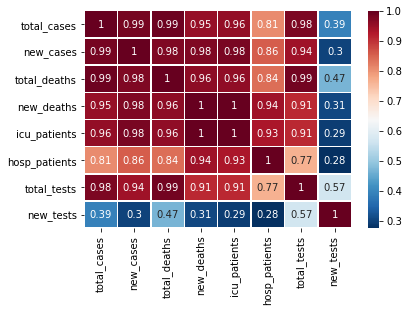

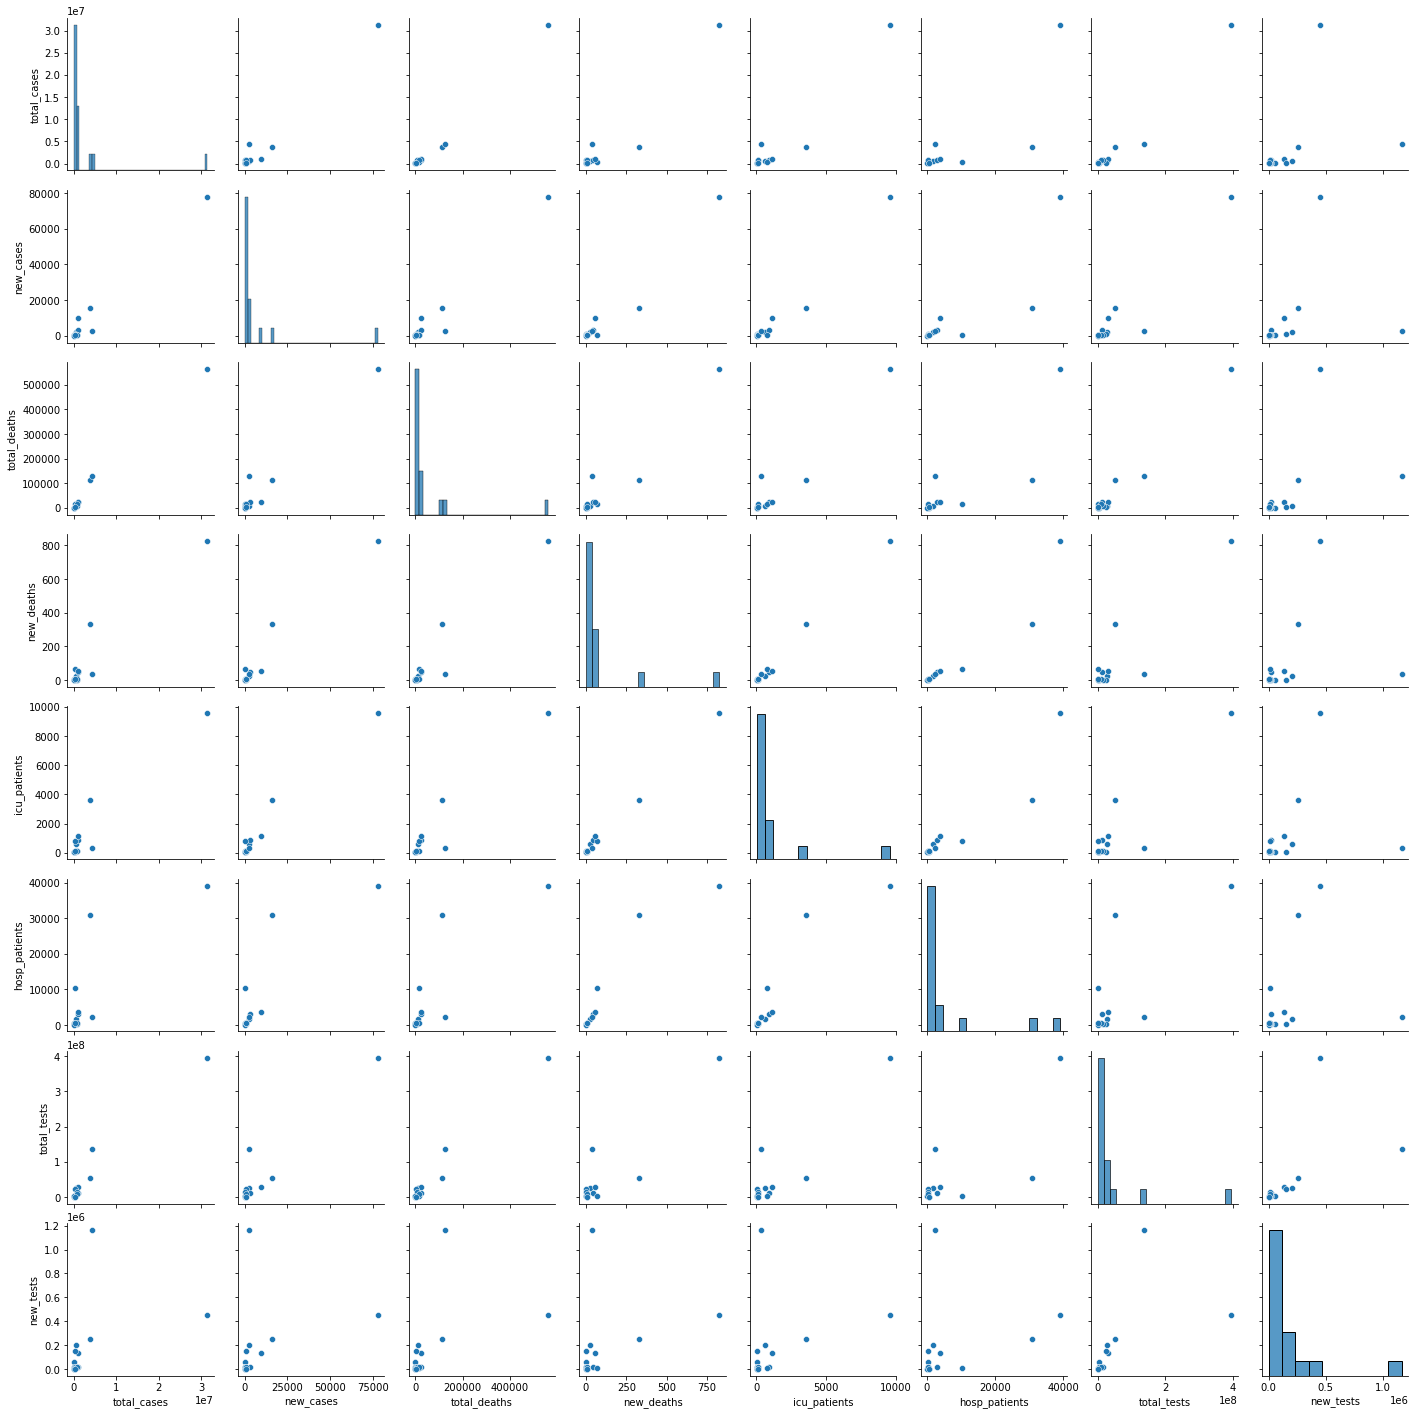

In [33]:
analyze_1(data4analysis2)

### Hypothesis 2 Interpretation:
There are strong indication in the above analysis that COVID-19 Intensity Variables and COVID-19 General Effect Variables are strongly related except for new cases and COVID-19 General Effect Variables that are weakly correlated. Nevertheless, total_vaccinations have been strongly correlated all through.
Therefore, H2 is rejected which says:there is no significant relationship between COVID-19 Intensitive Variables and COVID-19 General Effect Variable.

### Taking the Analysis Further (Multiple/Mutivariate Regression Model):
The Multiple Regression Analysis will  explain the relationship between the COVID-19 General Effect 
Variables, and both of COVID-19 Intensive Variables and COVID-19 Preventive Variables
#### Factors to Consider in Multiple Regression Model
- Absence of Multicollinearity in the Model
- Check for the normality of the residuals
- Checking the Mean of the Residuals Equals 0

In [34]:
used_data_ = load_data('owid-covid-data.csv', gen_effect_var+intensive_var+preventive_var )
used_data3 = get_last_row(used_data_)
dependent_var = used_data3[used_data3.columns[4:8]]
independent_var = used_data3[used_data3.columns[8:]]

- #### Factor I: Testing multicollinearity
Highly correlated explanatory/independent variables are removed so that they could be redundancy. This is done before the Model is built.


,icu_patients,hosp_patients,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,16.000000,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
mean,1096.187500,5886.812500,4.505180e+07,1.569086e+05,1.737644e+07,1.166277e+07,6.047113e+06
std,2421.238807,11742.376053,9.923350e+07,2.956337e+05,4.775178e+07,3.057942e+07,1.862493e+07
min,30.000000,129.000000,1.105344e+06,4.580000e+02,1.302790e+05,9.605400e+04,3.422500e+04
25%,50.000000,221.250000,3.703429e+06,1.190775e+04,5.447892e+05,4.293038e+05,1.083045e+05
50%,134.000000,608.000000,1.062826e+07,1.951500e+04,1.735098e+06,1.284386e+06,5.394055e+05
75%,825.500000,3255.250000,2.738356e+07,1.657395e+05,9.479370e+06,6.092400e+06,1.627389e+06
max,9543.000000,39132.000000,3.950826e+08,1.162840e+06,1.922828e+08,1.222955e+08,7.532228e+07


,icu_patients,hosp_patients,total_tests,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated
icu_patients,1.000000,0.933498,0.911284,0.293605,0.927075,0.918621,0.935271
hosp_patients,0.933498,1.000000,0.766682,0.274802,0.766218,0.759914,0.770876
total_tests,0.911284,0.766682,1.000000,0.568359,0.989168,0.994343,0.970886
new_tests,0.293605,0.274802,0.568359,1.000000,0.452131,0.496842,0.362305
total_vaccinations,0.927075,0.766218,0.989168,0.452131,1.000000,0.998459,0.994485
people_vaccinated,0.918621,0.759914,0.994343,0.496842,0.998459,1.000000,0.987148
people_fully_vaccinated,0.935271,0.770876,0.970886,0.362305,0.994485,0.987148,1.000000


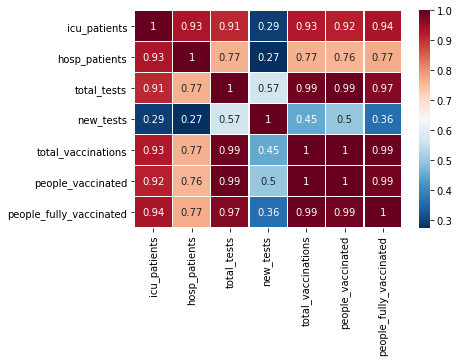

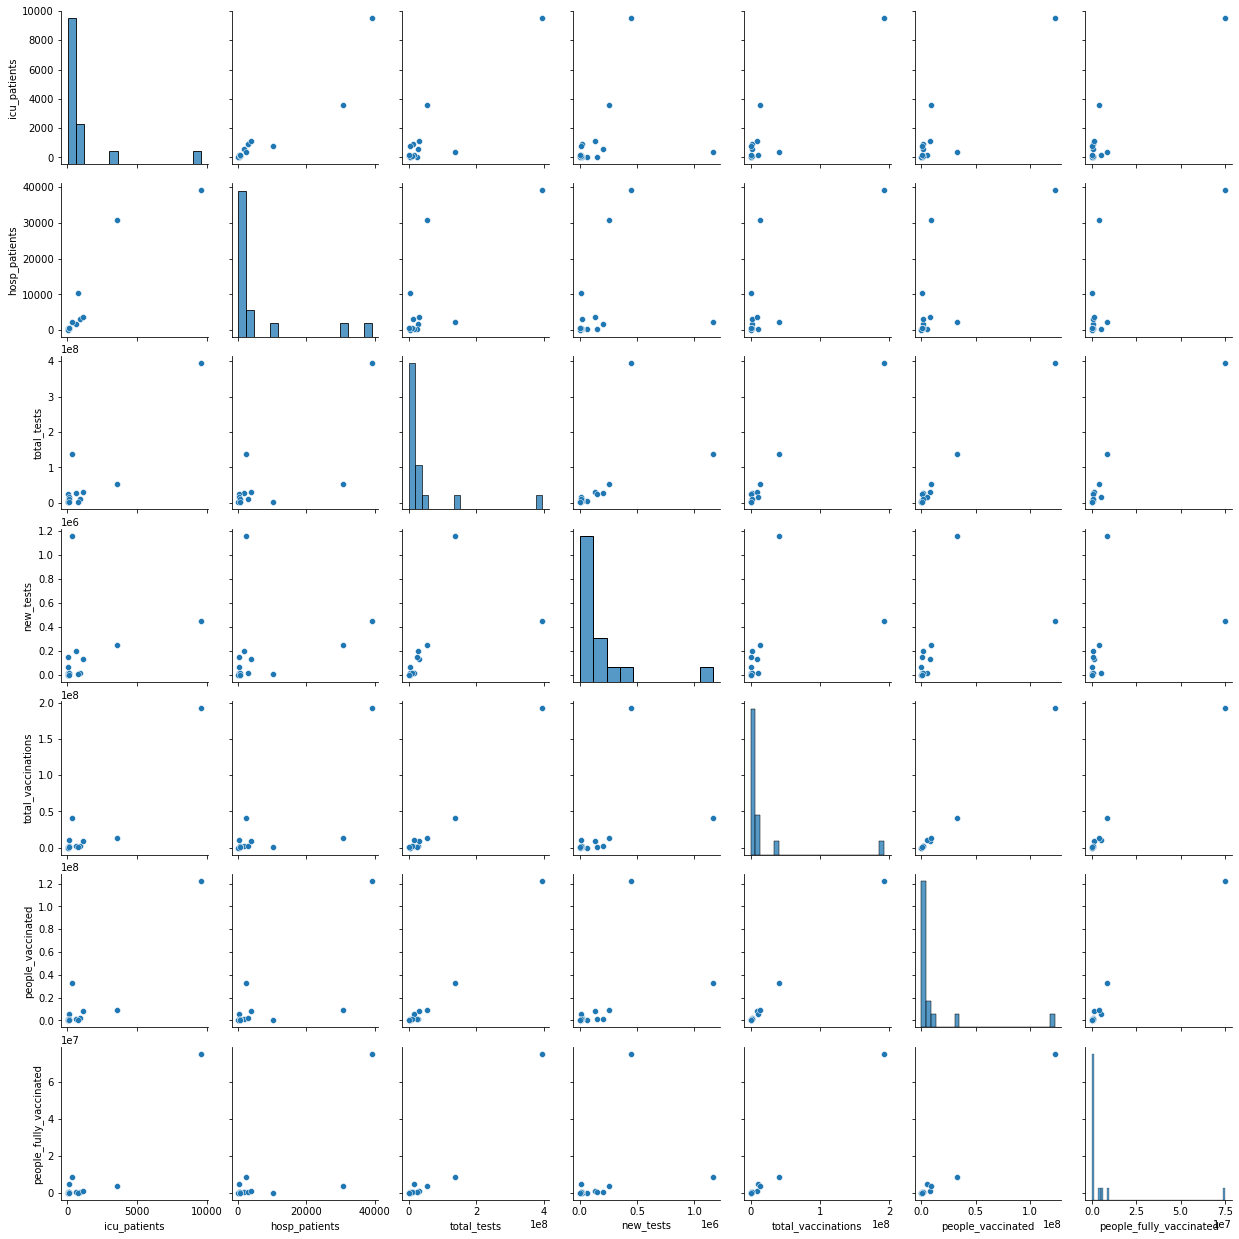

In [36]:
analyze_1(independent_var)

 #### Variance Inflation Factor (VIF): 
 <p> VIF is a measure of how much a particular variable is contributing to the standard error in the regression model. When significant multicollinearity exists, the variance inflation factor will be huge for the variables in the calculation.</p>
<p>From the correlation table and the heat map 'icu_patients','total_tests','people_fully_vaccinated', 'people_vaccinated'
are highly correlated some other explanatory variable e.g. 'icu_patients' and 'hosp_patients' are highly correlated, so to avoid duplicate 'icu_patients' is pulled out a,ong with others.</p>

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                           2.387513
icu_patients                  274.816163
hosp_patients                  54.974616
total_tests                  1706.385530
new_tests                     151.013042
total_vaccinations         388572.455857
people_vaccinated          159141.458031
people_fully_vaccinated     59044.771665
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                 1.492359
hosp_patients         2.460259
new_tests             1.276891
total_vaccinations    2.858889
dtype: float64

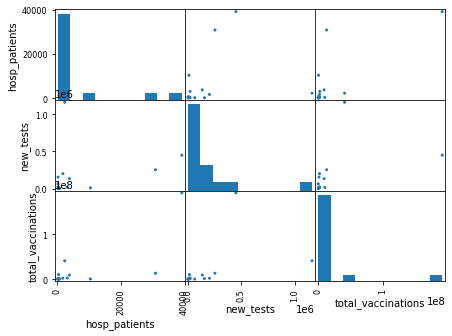

In [40]:
# Calling variance_inflation_factor - check_var_inf_fact to check if we pulling down the right variables.
drop_var = ['icu_patients','total_tests','people_fully_vaccinated', 'people_vaccinated'] 
check_var_inf_fact(independent_var, drop_var)

Data show that After Variance_Inflation_Factor we retaining only ['hosp_patients', 'news_test', 'total_vaccinations']. I am reloading the data to expand the coverage.

In [84]:
remain_var = ['hosp_patients', 'new_tests', 'total_vaccinations']
dependent_var2_ = list(dependent_var.columns[0:])
used_data4 = load_data('owid-covid-data.csv', dependent_var2_+remain_var)
used_data4 = get_last_row(used_data4)

print('size of the data before dropping multicollineared variables:', used_data3.shape)
print('size of the data after dropping multicollineared variables:', used_data4.shape)
dependent_var2 = used_data4[used_data4.columns[4:8]]
independent_var2 = used_data4[used_data4.columns[8:]]

size of the data before dropping multicollineared variables: (16, 15)
size of the data after dropping multicollineared variables: (27, 11)


In [87]:
list(used_data4['location'])
print('List of countries whose data are available for multiple regression ',list(used_data4['location']))

List of countries whose data are available for multiple regression  ['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Norway', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Sweden', 'United Kingdom', 'United States']


,hosp_patients,new_tests,total_vaccinations
count,27.000000,2.700000e+01,2.700000e+01
mean,6744.370370,1.182692e+05,1.156463e+07
std,11777.898017,2.375477e+05,3.706677e+07
min,0.000000,4.580000e+02,7.972600e+04
25%,312.000000,1.021200e+04,5.804225e+05
50%,1705.000000,1.964400e+04,1.333999e+06
75%,4507.000000,1.124040e+05,5.902629e+06
max,39132.000000,1.162840e+06,1.922828e+08


,hosp_patients,new_tests,total_vaccinations
hosp_patients,1.000000,0.192981,0.593913
new_tests,0.192981,1.000000,0.457736
total_vaccinations,0.593913,0.457736,1.000000


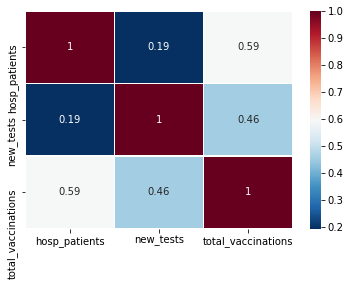

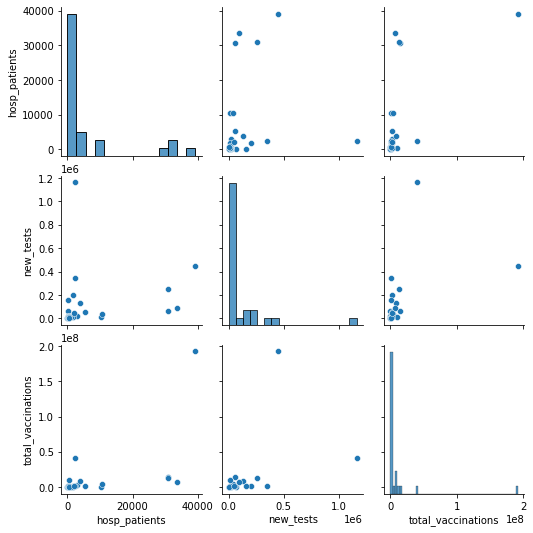

In [42]:
# Recheck the Multicollinearity
analyze_1(independent_var2)

###  Building Multiple Regression Model
Statsmodel module was used to create Model for each instance of the dependent variables (General Effect Variables) with the other remaining independent variables (hosp_patients, new_tests, total_vaccinations).



In [55]:
dep_var = list(dependent_var2.columns)
store_model = []
for items in dep_var:
    print('OLS Regression Model Results for ',items)
    model_OLS = create_OLS_Model(dependent_var2[items], independent_var2)
    print(type(model_OLS))
    store_model.append(model_OLS)
    display(model_OLS.summary())

OLS Regression Model Results for  total_cases
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1548.
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.15e-26
Time:                        04:09:41   Log-Likelihood:                -387.48
No. Observations:                  27   AIC:                             783.0
Df Residuals:                      23   BIC:                             788.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.807e+04   1.08e+05      0.912      0.371   -1.24e+05    3.21e+05
hosp_patients         65.7614      9.327      7.051      0.000      46.467      85.056
new_tests             -1.6059      0.418     -3.838      0.001      -2.472      -0.740
total_vaccinations     0.1525      0.003     46.640      0.000       0.146       0.159
==============================================================================
Omnibus:                        0.624   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.114
Skew:                           0.145   Prob(JB):                        0.944
Kurtosis:                       3.131   Cond. No.                     4.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS Regression Model Results for  new_cases
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     11.85
Date:                Thu, 06 May 2021   Prob (F-statistic):           6.78e-05
Time:                        04:09:41   Log-Likelihood:                -300.06
No. Observations:                  27   AIC:                             608.1
Df Residuals:                      23   BIC:                             613.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -257.0456   4221.148     -0.061      0.952   -8989.156    8475.065
hosp_patients          1.4787      0.366      4.040      0.001       0.722       2.236
new_tests             -0.0101      0.016     -0.618      0.543      -0.044       0.024
total_vaccinations     0.0001      0.000      1.140      0.266      -0.000       0.000
==============================================================================
Omnibus:                       40.850   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.494
Skew:                           2.715   Prob(JB):                     2.35e-40
Kurtosis:                      14.521   Cond. No.                     4.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS Regression Model Results for  total_deaths
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_deaths   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1184.
Date:                Thu, 06 May 2021   Prob (F-statistic):           2.48e-25
Time:                        04:09:41   Log-Likelihood:                -283.07
No. Observations:                  27   AIC:                             574.1
Df Residuals:                      23   BIC:                             579.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -795.0087   2249.922     -0.353      0.727   -5449.327    3859.310
hosp_patients          1.8376      0.195      9.419      0.000       1.434       2.241
new_tests              0.0192      0.009      2.193      0.039       0.001       0.037
total_vaccinations     0.0025   6.84e-05     36.733      0.000       0.002       0.003
==============================================================================
Omnibus:                        4.944   Durbin-Watson:                   2.818
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.657
Skew:                          -0.425   Prob(JB):                        0.161
Kurtosis:                       4.590   Cond. No.                     4.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS Regression Model Results for  new_deaths
<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_deaths   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     55.67
Date:                Thu, 06 May 2021   Prob (F-statistic):           1.06e-10
Time:                        04:09:41   Log-Likelihood:                -153.24
No. Observations:                  27   AIC:                             314.5
Df Residuals:                      23   BIC:                             319.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3429     18.363      0.237      0.815     -33.643      42.329
hosp_patients          0.0125      0.002      7.878      0.000       0.009       0.016
new_tests          -6.096e-05   7.14e-05     -0.853      0.402      -0.000    8.68e-05
total_vaccinations  1.896e-06   5.58e-07      3.396      0.002    7.41e-07    3.05e-06
==============================================================================
Omnibus:                       27.733   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.029
Skew:                           1.672   Prob(JB):                     2.32e-21
Kurtosis:                      11.561   Cond. No.                     4.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- #### Factor II: Checking for the Normality of the Residuals
Checking if residuals are normally distributed i.e. check how the data hugs around the line
- #### Factor III: Checking the Mean of the Residuals Equals 0
 

The normality of the residual & The mean of the residuals for  total_cases


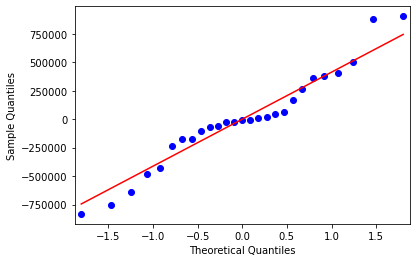

The mean of the residuals is 2.699e-08
The normality of the residual & The mean of the residuals for  new_cases


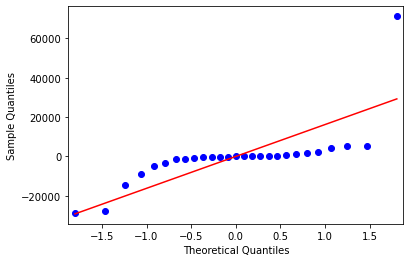

The mean of the residuals is 7.554e-10
The normality of the residual & The mean of the residuals for  total_deaths


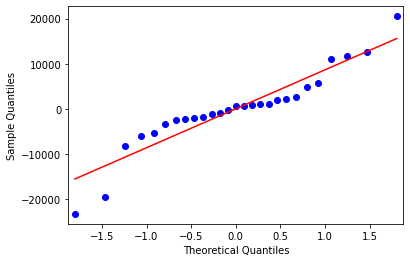

The mean of the residuals is 9.713e-10
The normality of the residual & The mean of the residuals for  new_deaths


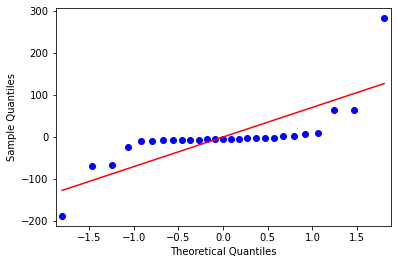

The mean of the residuals is 6.04e-12


In [45]:
for items in range(len(dep_var)):
    print("The normality of the residual & The mean of the residuals for ", dep_var[items])
    sm.qqplot(store_model[items].resid, line='s')
    plt.show()
    # check that the mean of the residuals is approx. 0.
    mean_residuals = sum(store_model[items].resid)/ len(store_model[items].resid)
    print("The mean of the residuals is {:.4}".format(mean_residuals))
    

- ##### Explaining the Acceptance of Factor II & Factor III
The results of the residual normality show how data from the predicators(independent variables) hug around the line in total_cases and total_deaths while in the others they were not pretty good enough but they will still be considered/accepted because their mean of the residuals are both 0 approximately.

### Model Result Interpretation

- ####  total_cases:
The model is significant: having F-Statistics(1548), p < 0.0005.The model explains 99.4% of the variance (Adjusted R square = 0.994). According to the information on the model all the independent variables: hosp_patients, new_tests, and total_vaccination are significant predictors for total_cases.

- #### new_cases:
The model is significant: having F-Statistics(11.85), p < 0.0005.The model explains 60.7% of the variance (Adjusted R square = 0.556). According to the information on the model only total_vaccination is significant predictor for new_cases while hosp_patients and new_tests are not significants.

- #### total_cases:
The model is significant: having F-Statistics(1184), p < 0.0005.The model explains 99.4% of the variance (Adjusted R square = 0.993). According to the information on the model only hosp_patients and total_vaccination is significant predictors for total_cases while new_tests is not significant.

- #### new_deaths:
The model is significant: having F-Statistics(55.67), p < 0.0005.The model explains 87.9% of the variance (Adjusted R square = 0.863). According to the information on the model only hosp_patients and total_vaccination is significant predictors for new_deaths while new_tests is not significant.

### Reference:
- https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/multi-linear-regression/Machine%20Learning%20-%20Multi%20Linear%20Regression%20Analysis.ipynb

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
